In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, classification_report, accuracy_score

In [63]:
full_df = pd.read_csv("C:/Users/Kiat Kai/Desktop/NOTES/Y4S2/ST4248/winequality-red.csv")
full_df.shape

bins = (2, 4, 6, 8)
group_names = ['bad', 'normal', 'good']
full_df['quality'] = pd.cut(full_df['quality'], bins = bins, labels = group_names)
full_df.to_csv("full_df_with_segmentation.csv")

In [32]:
full_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal


## Perform preprocessing
- We upsample those wine qualities with much lower counts than the majority wine quality

In [113]:
full_df_bad = full_df[full_df.quality=="bad"]
full_df_normal = full_df[full_df.quality=="normal"]
full_df_good = full_df[full_df.quality=="good"]
print(full_df_bad.shape)
print(full_df_normal.shape)
print(full_df_good.shape)

# Combine downsampled majority class with upsampled minority class
data = pd.concat([full_df_bad, full_df_good, full_df]).reset_index(drop=True)

data.to_csv("wine_segmentations.csv")

(63, 12)
(1319, 12)
(217, 12)


In [38]:
# Upsample MINORITY Class to make balance data :
full_df_bad_upsampled = resample(full_df_bad, replace=True, n_samples=1319, random_state=12) 
full_df_good_upsampled = resample(full_df_good, replace=True, n_samples=1319, random_state=12)

In [114]:
# Combine downsampled majority class with upsampled minority class
data = pd.concat([full_df_bad_upsampled, full_df_good_upsampled, full_df_normal]).reset_index(drop=True)

data.to_csv("balanced_wine_segmentations.csv")

In [119]:
data.describe()[["fixed acidity","citric acid","residual sugar","density","pH","alcohol"]].iloc[1:7,]

,fixed acidity,citric acid,residual sugar,density,pH,alcohol
mean,8.349507,0.27559,2.656988,0.996531,3.322024,10.658517
std,1.809765,0.21126,1.570254,0.001921,0.160020,1.136520
min,4.600000,0.00000,0.900000,0.990070,2.740000,8.400000
25%,7.100000,0.07000,1.900000,0.995280,3.230000,9.700000
50%,8.000000,0.27000,2.200000,0.996520,3.320000,10.500000
75%,9.400000,0.45000,2.700000,0.997600,3.410000,11.400000


## Train Test Split

In [40]:
# Split into X and Y
Y = data.iloc[:,-1]
X = data.drop(data.columns[-1], axis=1)

# Now, train test split
X_train, Xtest, Y_train, Ytest = train_test_split(X, Y, train_size=0.8, random_state=101)

# Scale the data to a range of 0 to 1
#scaler = MinMaxScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
#Xtest = pd.DataFrame(scaler.fit_transform(Xtest), columns = Xtest.columns)
#Y_train = pd.DataFrame(scaler.fit_transform(Y_train.values.reshape(-1,1)), columns = [Y_train.name])
#Ytest = pd.DataFrame(scaler.fit_transform(Ytest.values.reshape(-1,1)), columns = [Ytest.name])

## 1) LDA

In [46]:
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, Y_train).predict(Xtest)
f1_lda = f1_score(Ytest, y_pred, average='macro')
acc_lda = accuracy_score(y_pred, Ytest)
print("F1 Score for Linear Discriminant Analysis Classifier is", f1_lda)
print("Accuracy Score for Linear Discriminant Analysis Classifier is", acc_lda)
print(classification_report(Ytest,y_pred))

F1 Score for Linear Discriminant Analysis Classifier is 0.6937890058546466
Accuracy Score for Linear Discriminant Analysis Classifier is 0.6982323232323232
              precision    recall  f1-score   support

         bad       0.68      0.74      0.71       255
        good       0.77      0.85      0.81       264
      normal       0.62      0.51      0.56       273

    accuracy                           0.70       792
   macro avg       0.69      0.70      0.69       792
weighted avg       0.69      0.70      0.69       792



## 2) QDA

In [47]:
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train, Y_train).predict(Xtest)
f1_qda = f1_score(Ytest, y_pred, average='macro')
acc_qda = accuracy_score(y_pred, Ytest)
print("F1 Score for Quadratic Discriminant Analysis Classifier is", f1_qda)
print("Accuracy Score for Quadratic Discriminant Analysis Classifier is", acc_qda)
print(classification_report(Ytest,y_pred))

F1 Score for Quadratic Discriminant Analysis Classifier is 0.7187900586567183
Accuracy Score for Quadratic Discriminant Analysis Classifier is 0.7196969696969697
              precision    recall  f1-score   support

         bad       0.77      0.65      0.70       255
        good       0.78      0.87      0.82       264
      normal       0.62      0.64      0.63       273

    accuracy                           0.72       792
   macro avg       0.72      0.72      0.72       792
weighted avg       0.72      0.72      0.72       792



## 3) Naive Bayes

In [48]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(Xtest)
f1_nb = f1_score(Ytest, y_pred, average='macro')
acc_nb = accuracy_score(y_pred, Ytest)
print("F1 Score for Naive Bayes Classifier is", f1_nb)
print("Accuracy Score for Naive Bayes Classifier is", acc_nb)
print(classification_report(Ytest,y_pred))

F1 Score for Naive Bayes Classifier is 0.6539447016900598
Accuracy Score for Naive Bayes Classifier is 0.6565656565656566
              precision    recall  f1-score   support

         bad       0.65      0.64      0.64       255
        good       0.74      0.81      0.77       264
      normal       0.57      0.52      0.54       273

    accuracy                           0.66       792
   macro avg       0.65      0.66      0.65       792
weighted avg       0.65      0.66      0.65       792



## 4) Random Forest

In [76]:
rfc=RandomForestClassifier(random_state=100)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': [3, 4],
    'max_depth' : [4,6,8,10,12,14],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14],
                         'max_features': [3, 4],
                         'n_estimators': [200, 300, 400, 500]})

In [77]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 3,
 'n_estimators': 200}

In [86]:
# Best parameters after tuning:
rf = RandomForestClassifier(random_state=100, n_estimators=200, criterion='entropy', max_depth=14, max_features=3)
y_pred = rf.fit(X_train, Y_train).predict(Xtest)
f1_rf = f1_score(Ytest, y_pred, average='macro')
acc_rf = accuracy_score(y_pred, Ytest)
print("F1 Score for Random Forest Classifier is", f1_rf)
print("Accuracy Score for Random Forest Classifier is", acc_rf)
print(classification_report(Ytest,y_pred))

F1 Score for Random Forest Classifier is 0.9686785205539873
Accuracy Score for Random Forest Classifier is 0.9684343434343434
              precision    recall  f1-score   support

         bad       0.98      1.00      0.99       255
        good       0.95      0.98      0.96       264
      normal       0.98      0.93      0.95       273

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



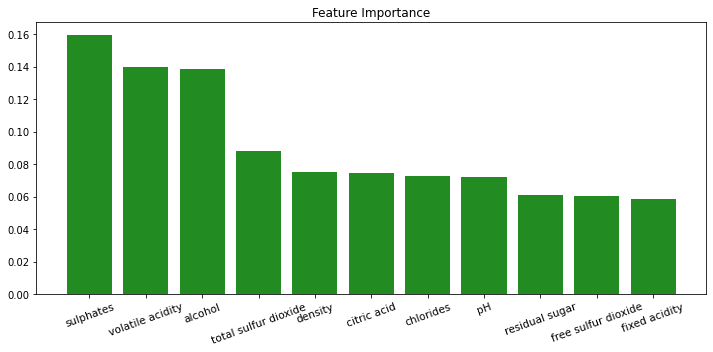

In [128]:
# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,5))
plt.bar(range(X.shape[1]), importances[indices], color="forestgreen")
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 10.5)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

## 5) Support Vector Classifier

In [110]:
svc=SVC(random_state=100)

param_grid = { 
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel': ['linear','rbf']
}

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5)
CV_svc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=100),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']})

In [111]:
CV_svc.best_params_

{'C': 1.4, 'kernel': 'linear'}

In [109]:
# Best parameters after tuning:
svc = SVC(random_state=100, C=1.4, kernel="linear")
y_pred = svc.fit(X_train, Y_train).predict(Xtest)
f1_svc = f1_score(Ytest, y_pred, average='macro')
acc_svc = accuracy_score(y_pred, Ytest)
print("F1 Score for Support Vector Classifier is", f1_svc)
print("Accuracy Score for Support Vector Classifier is", acc_svc)
print(classification_report(Ytest,y_pred))

F1 Score for Support Vector Classifier is 0.657424252042719
Accuracy Score for Support Vector Classifier is 0.6666666666666666
              precision    recall  f1-score   support

         bad       0.62      0.76      0.69       255
        good       0.77      0.83      0.80       264
      normal       0.58      0.41      0.48       273

    accuracy                           0.67       792
   macro avg       0.66      0.67      0.66       792
weighted avg       0.66      0.67      0.66       792



## 6) Logistic Regression

In [53]:
LR = LogisticRegression(random_state=100)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

# Create grid search object
CV_Lr = GridSearchCV(estimator=LR, param_grid=param_grid, cv= 5)
CV_Lr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=100),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [54]:
CV_Lr.best_params_

{'C': 29.763514416313132, 'penalty': 'l2', 'solver': 'liblinear'}

In [55]:
# Best parameters after tuning:
Lr = LogisticRegression(random_state=100, C=29.763514416313132, penalty='l2',solver='liblinear')
y_pred = Lr.fit(X_train, Y_train).predict(Xtest)
f1_Lr = f1_score(Ytest, y_pred, average='macro')
acc_lr = accuracy_score(y_pred, Ytest)
print("F1 Score for Multinomial Logistic Regression is", f1_Lr)
print("Accuracy Score for Logistics Regression is", acc_lr)
print(classification_report(Ytest,y_pred))

F1 Score for Multinomial Logistic Regression is 0.6736055017533946
Accuracy Score for Logistics Regression is 0.6868686868686869
              precision    recall  f1-score   support

         bad       0.64      0.78      0.70       255
        good       0.77      0.89      0.83       264
      normal       0.62      0.41      0.49       273

    accuracy                           0.69       792
   macro avg       0.68      0.69      0.67       792
weighted avg       0.68      0.69      0.67       792



## 7) Decision tree

In [56]:
DT = DecisionTreeClassifier(random_state=100)

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_features' :['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(1,20)
}

# Create grid search object
CV_tree = GridSearchCV(estimator=DT, param_grid=param_grid, cv= 5)
CV_tree.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [57]:
CV_tree.best_params_

{'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto'}

In [58]:
# Best parameters after tuning:
Dt = DecisionTreeClassifier(random_state=100, criterion='gini', max_depth=19, max_features='auto')
y_pred = Dt.fit(X_train, Y_train).predict(Xtest)
f1_Dt = f1_score(Ytest, y_pred, average='macro')
acc_dt = accuracy_score(y_pred, Ytest)
print("F1 Score for Decision Tree is", f1_Dt)
print("Accuracy Score for decision tree classifier is", acc_dt)
print(classification_report(Ytest,y_pred))

F1 Score for Decision Tree is 0.9571614480889795
Accuracy Score for decision tree classifier is 0.9570707070707071
              precision    recall  f1-score   support

         bad       0.97      1.00      0.98       255
        good       0.93      0.98      0.95       264
      normal       0.98      0.89      0.93       273

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



## Evaluating all models

In [112]:
# Dataframe to contain model results
model_results = pd.DataFrame(columns=["Models","F1 Score","Accuracy Score"])

# LDA
model_results = model_results.append(pd.DataFrame({"Models":"Linear Discriminant Analysis", 
                                  "F1 Score":f1_lda, "Accuracy Score":acc_lda}
                                                  , index = [0]), ignore_index = False)
# QDA
model_results = model_results.append(pd.DataFrame({"Models":"Quadratic Discriminant Analysis", 
                                  "F1 Score":f1_qda, "Accuracy Score":acc_qda}
                                                  , index = [1]), ignore_index = False)
# Naive Bayes
model_results = model_results.append(pd.DataFrame({"Models":"Naive Bayes", 
                                  "F1 Score":f1_nb, "Accuracy Score":acc_nb}
                                                  , index = [2]), ignore_index = False)
# Random Forest
model_results = model_results.append(pd.DataFrame({"Models":"Random Forest", 
                                  "F1 Score":f1_rf, "Accuracy Score":acc_rf}
                                                  , index = [3]), ignore_index = False)
# Support Vector Classifier
model_results = model_results.append(pd.DataFrame({"Models":"Support Vector Classifier", 
                                  "F1 Score":f1_svc, "Accuracy Score":acc_svc}
                                                  , index = [4]), ignore_index = False)
# Multinomial Logistic Regression
model_results = model_results.append(pd.DataFrame({"Models":"Multinomial Logistic Regression", 
                                  "F1 Score":f1_Lr, "Accuracy Score":acc_lr}
                                                  , index = [5]), ignore_index = False)
# Decision Tree
model_results = model_results.append(pd.DataFrame({"Models":"Decision Tree", 
                                  "F1 Score":f1_Dt, "Accuracy Score":acc_dt}
                                                  , index = [6]), ignore_index = False)

print(model_results.sort_values(by="F1 Score", ascending = False))
model_results.to_csv("model_results_upsample_segmentation.csv")

                            Models  F1 Score  Accuracy Score
3                    Random Forest  0.968679        0.968434
6                    Decision Tree  0.957161        0.957071
1  Quadratic Discriminant Analysis  0.718790        0.719697
0     Linear Discriminant Analysis  0.693789        0.698232
5  Multinomial Logistic Regression  0.673606        0.686869
4        Support Vector Classifier  0.657424        0.666667
2                      Naive Bayes  0.653945        0.656566


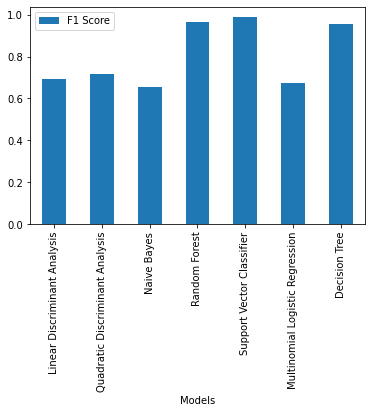

In [72]:
model_results = model_results.set_index(model_results.Models)
model_results.iloc[:,1].plot.bar(x=model_results.Models,y=model_results["F1 Score"])
plt.legend()